In [1]:
#importing the required packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from sklearn.metrics import classification_report

In [2]:
train= pd.read_csv("sign_mnist_train/sign_mnist_train.csv")
test= pd.read_csv("sign_mnist_test/sign_mnist_test.csv")

#visualizing the first 5 entries of the train data
train.head()
#header row of label 
#pixel1,pixel2…pixel784 represents a single 28x28 pixel image with grayscale values between 0-255. 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
print("Number of training samples : ",train.shape[0])
print("Number of testing  samples : ",test.shape[0])

Number of training samples :  27455
Number of testing  samples :  7172


In [4]:
#divding the data into input and labels and reshaping as required by input to the CNN

from keras.utils import to_categorical 
x_train=train.iloc[:,1:]
y_train = train['label']

x_test=test.iloc[:,1:]
y_test = test['label']

x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)



#]the desired shape for input layer is : [batch_size, 28, 28, 1]

#In reshape -1 specifies that this dimension should be dynamically 
#computed based on the number of input values in x,
#holding the size of all other dimensions constant.

C:\Users\Aditi\anaconda3\envs\tf-ibm\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

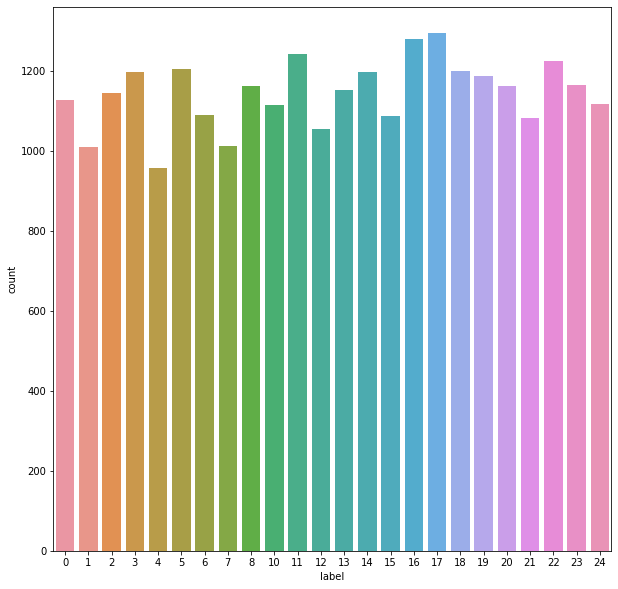

In [5]:
plt.figure(figsize = (10,10)) 
sns.countplot(y_train)

#The countplot for the training labels shows that the data is distributed in a balance manner for each label.
#Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z 
#and no cases for 9=J or 25=Z because of gesture motions.

(-0.5, 27.5, 27.5, -0.5)

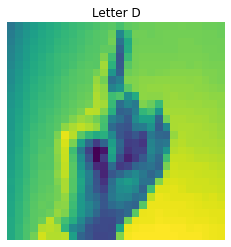

In [6]:
#plotting a random image from the training data set with label

plt.imshow(x_train[0]) 
plt.title("Letter "+ chr(65+ y_train[0]))
plt.axis('off')


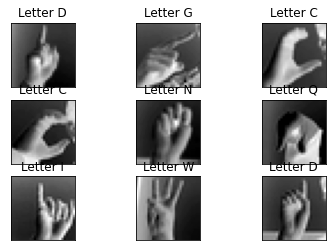

In [7]:
#performing grayscale normalization to reduce the effect of illumination and plotting the first nine images with labels
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255


for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.title("Letter "+ chr(65+ y_train[i]))
    
plt.subplots_adjust(wspace=0.5)
plt.show()


In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [13]:

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(24, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

In [ ]:
# model = Sequential()
# model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28, 28 ,1), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2, 2)))

# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2, 2)))

# model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2, 2)))

# model.add(Flatten())

# model.add(Dense(128, activation = 'relu'))

# model.add(Dense(24, activation = 'softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# model.summary()

In [14]:
DESIRED_ACCURACY = 0.999

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>DESIRED_ACCURACY):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = myCallback()

In [15]:
history = model.fit(x_train,y_train, batch_size = 128,epochs=100,validation_split=0.2,callbacks=[callbacks])

Epoch 1/100
172/172 [==============================] - 13s 78ms/step - loss: 2.7579 - accuracy: 0.1572 - val_loss: 1.6170 - val_accuracy: 0.5270
Epoch 2/100
172/172 [==============================] - 14s 83ms/step - loss: 1.4583 - accuracy: 0.5061 - val_loss: 0.8679 - val_accuracy: 0.7286
Epoch 3/100
172/172 [==============================] - 15s 84ms/step - loss: 0.9796 - accuracy: 0.6640 - val_loss: 0.5236 - val_accuracy: 0.8514
Epoch 4/100
172/172 [==============================] - 15s 87ms/step - loss: 0.7384 - accuracy: 0.7463 - val_loss: 0.3667 - val_accuracy: 0.8991
Epoch 5/100
172/172 [==============================] - 16s 92ms/step - loss: 0.5640 - accuracy: 0.8057 - val_loss: 0.2358 - val_accuracy: 0.9353
Epoch 6/100
172/172 [==============================] - 23s 134ms/step - loss: 0.4730 - accuracy: 0.8356 - val_loss: 0.1877 - val_accuracy: 0.9574
Epoch 7/100
172/172 [==============================] - 18s 103ms/step - loss: 0.3914 - accuracy: 0.8677 - val_loss: 0.1168 - val_

Text(0.5, 1.0, 'Accuracy vs Epochs')

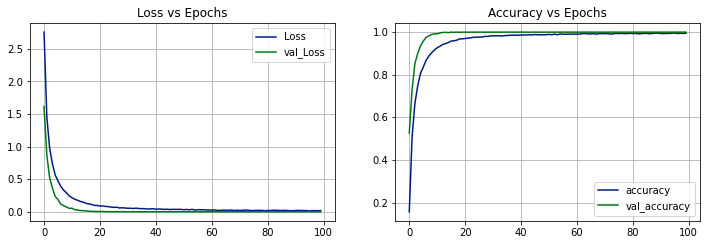

In [16]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-dark-palette')

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss vs Epochs')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy vs Epochs')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


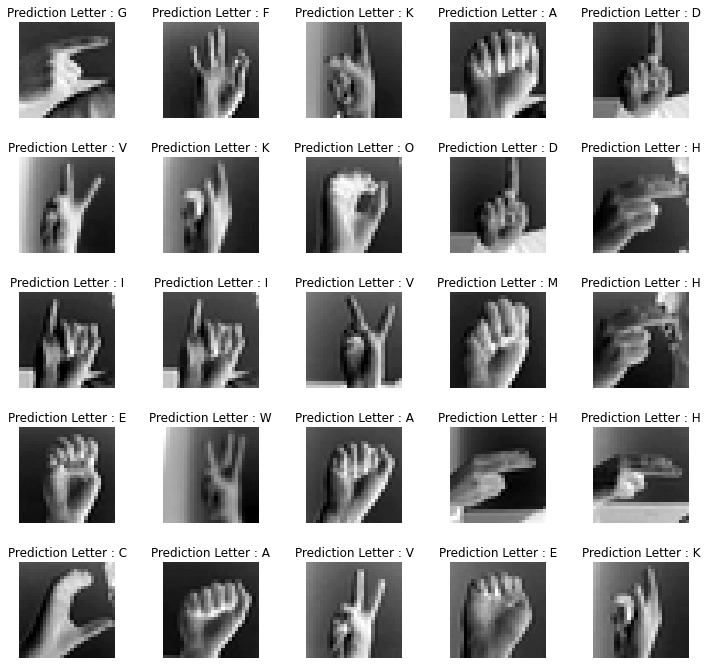

In [17]:
#Visualize predictions

predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]        
  
fig, axes = plt.subplots(5, 5, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,25):  
    axes[i].imshow(x_test[i],cmap=plt.cm.binary)
    axes[i].set_title("Prediction Letter : " + chr(65+predictions[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [18]:
#printing the classification report and model accuracy

classes = ["Class " + chr(i+65) for i in range(25) if i != 9]
print(classification_report(test['label'], predictions, target_names = classes))

from sklearn.metrics import accuracy_score
print(accuracy_score(test['label'],predictions))

              precision    recall  f1-score   support

     Class A       1.00      1.00      1.00       331
     Class B       1.00      0.95      0.97       432
     Class C       0.89      1.00      0.94       310
     Class D       1.00      1.00      1.00       245
     Class E       1.00      0.98      0.99       498
     Class F       1.00      1.00      1.00       247
     Class G       0.87      0.81      0.84       348
     Class H       0.91      0.95      0.93       436
     Class I       0.95      0.86      0.91       288
     Class K       0.98      1.00      0.99       331
     Class L       1.00      1.00      1.00       209
     Class M       0.95      1.00      0.97       394
     Class N       1.00      0.93      0.96       291
     Class O       1.00      0.84      0.91       246
     Class P       0.99      1.00      0.99       347
     Class Q       1.00      1.00      1.00       164
     Class R       0.99      0.85      0.91       144
     Class S       0.90    

In [19]:
#saving the model
model.save('mnist_asl_v2.h5')

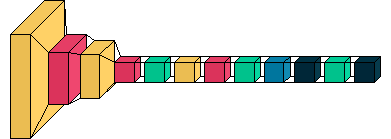

In [1]:
from keras import models
import visualkeras

MODEL_NAME = "mnist_asl_v2.h5"

model = models.load_model(MODEL_NAME)

visualkeras.layered_view(model,to_file='output.png').show() 

visualkeras.layered_view(model)